# Exercise 5: Creating and plotting histograms

https://docs.opencv.org/4.6.0/d1/db7/tutorial_py_histogram_begins.html

In this exercise you will learn how to:
- Create image histograms using functions from OpenCV `cv.calcHist()` and Numpy `np.histogram()`.
- Plot histograms using functions `plt.hist()` and `plt.plot()` from Matplotlib.

## Theory

<p>
<img width="300" height="300" src="../notebook_images/histogram_sample.jpg" align="right">

So what is histogram? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) on the X-axis and corresponding number of pixels with that value on the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you can get an intuition about the contrast, brightness, intensity distribution, etc. of that image. Almost all image processing tools today, provide features based on histograms. To the right is an image from the [Cambridge in Color website](https://www.cambridgeincolour.com/tutorials/histograms1.htm) and its histogram. Note that this histogram is calculated on the grayscale image, not the color image (i.e. the color image has first been converted into grayscale).

From the histogram we see that:
- The left region of the histogram shows the amount of darker pixels in the image.
- The right region of the histogram shows the amount of brighter pixels in the image.
- The darker region is bigger than the brighter region.
- The amount of midtones (pixel values in the mid-range, say around 127) are scarce.
</p>

## Creating histograms

Now that we have a basic idea of what a histogram is, let's look at how we can create histograms. Both OpenCV and Numpy come with built-in functions for creating histograms. Before using those functions, we need to understand some terminology related to histograms:
- `BINS`: The histogram above shows the number of pixels for every pixel value, from 0 to 255, i.e. you need 256 values to show the histogram above. But you could also create a histogram by counting the number of pixels with values within a certain interval of values, e.g. the intervals 0 to 15, 16 to 31, ..., 240 to 255. In this case, the range of each interval is 16 values, so you would need only 16 intervals to represent the histogram. So you would simply split the whole histogram to 16 sub-parts (intervals), where the value of each sub-part (interval) is the number of all pixels with intensities that fall within the range (interval) of a sub-part. Each sub-part (interval) is called "BIN" (or a "BUCKET"). In the first case, the number of bins was 256 (one for each pixel value 0-255), while in second case, teh number of bins is 16. The number of BINS is referred to as `histSize` in OpenCV.
- `DIMS`: The dimensions is the number of parameters for which we collect the data. In this case, we only collect data regarding  one parameter, the pixels' intensity values in the grayscale image, so here DIMS is 1.
- `RANGE`: This is the range of intensity values you want to measure. Normally, it is \[0,256\], i.e. all intensity values (8-bit channel).

## Example

https://docs.opencv.org/4.6.0/d8/dbc/tutorial_histogram_calculation.html  
https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/histogram_calculation/histogram_calculation.html#histogram-calculation

Imagine that a Matrix contains information of an image (i.e. intensity in the range 0-255):

![](../notebook_images/Histogram_Calculation_Theory_Hist0.jpg)

Since we know that the range of information values in this case is 256 values, we can segment our range in subparts (bins) like:

![](../notebook_images/bins.png)

and we can keep count of the number of pixels that fall in the range of each $bin_{i}$. Applying this to the example above we get the image below (axis x represents the bins and axis y the number of pixels in each of them).

![](../notebook_images/Histogram_Calculation_Theory_Hist1.jpg)


As a first step, let's import the python modules we need.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Creating histograms with OpenCV

We can use OpenCV's `cv.calcHist()` function to calculate a histogram for an image.

`hist = cv.calcHist(images, channels, mask, histSize, ranges)`
- `images`: an image of type uint8 or float32, which should be given in square brackets, i.e. `[img]`.
- `channels`: index of channel for which to calculate a histogram (also given within square brackets), e.g. for a grayscale image its value is `[0]`, for a color image `[0]`, `[1]` or `[2]` (to calculate histogram of the blue, green or red channel respectively).
- `mask`: an image mask. To find the histogram of the entire image, `None` is supplied, but if you want to find the histogram of particular region of interest (ROI) of the image, you have to create and supply an image mask for that ROI.
- `histSize`: the BIN count (also needs to be given within square brackets), e.g. `[256]` will create one bin for each pixel value.
- `ranges`: the RANGE of pixel values in the image (normally it is `[0,256]`).

The function returns `hist`, a 2-dimensional array in which each value represents a BIN with its corresponding BIN COUNT, e.g. with 256 bins, the shape of `hist` would be (256, 1).

Let's load an image, convert it to grayscale, and find its full histogram.

In [2]:
# Read an image and convert it to grayscale
img_gray = cv.imread('../data/home.jpg', 0) # 0 = cv.IMREAD_GRAYSCALE
print(f'img_gray.shape: {img_gray.shape}')

# Calculate the histogram (for the one and only grayscale channel)
hist = cv.calcHist([img_gray], [0], None, [256], [0,256])
print(f'\nhist.shape: {hist.shape}')

# Print the number of pixels in the first- and last bins
print(f'\nNumber of pixels in first bin : {hist[0][0]}')
print(f'Number of pixels in last bin  : {hist[-1][0]}')

img_gray.shape: (384, 512)

hist.shape: (256, 1)

Number of pixels in first bin : 163.0
Number of pixels in last bin  : 1.0


## Creating histograms with Numpy

We can use Numpy's `np.histogram()` function to calculate a histogram for an image.

`hist, bins = np.histogram(a, bins, range)`
- `a`: The flattened image array (*flattened* means the image array is converted to a 1-dimensional array, e.g. `img.ravel()`).
- `bins`: The number of equal-width bins in the given range (10, by default), e.g. `256` for 256 bins (one bin per pixel value).
- `range`: The lower and upper range of the bins, e.g. `[0, 256]`.

The function returns `hist` and `bins`.
- `hist` is the same as we calculated before, but the returned array will be 1-dimensional.
- `bins` contains the bin edges, with length = len(hist)+1, i.e. the first bin would be in the interval $[bins[0], bins[1])$.


In [3]:
# Calculate the histogram (for the one and only grayscale channel)
hist, bins = np.histogram(img_gray.ravel(), 256, [0,256])
print(f'\nhist.shape: {hist.shape}')
print(f'bins.shape: {bins.shape}')

# Print the number of pixels in the first- and last bins
print(f'\nNumber of pixels in first bin : {hist[0]}')
print(f'Number of pixels in last bin  : {hist[-1]}')

# Print the bins edges of the first- and last bins
print(f'\nBin edges for Bin 0   : [{bins[0]}, {bins[1]})')
print(f'Bin edges for Bin {len(hist-1)} : [{bins[-2]}, {bins[-1]})')


hist.shape: (256,)
bins.shape: (257,)

Number of pixels in first bin : 163
Number of pixels in last bin  : 1

Bin edges for Bin 0   : [0.0, 1.0)
Bin edges for Bin 256 : [255.0, 256.0)


## Plotting histograms with Matplotlib

Matplotlib comes with a histogram plotting function `plt.hist()` that takes exactly the same input arguments as Numpy's `np.histogram()` function above, and returns a 3-tuple `(hist, bins, _)` where the 2 first elements contain exactly the same return values as `np.histogram()`. The difference is that the function `plt.hist()` also plots the histogram.

`(hist, bins, _) = plt.hist(a, bins, range)`

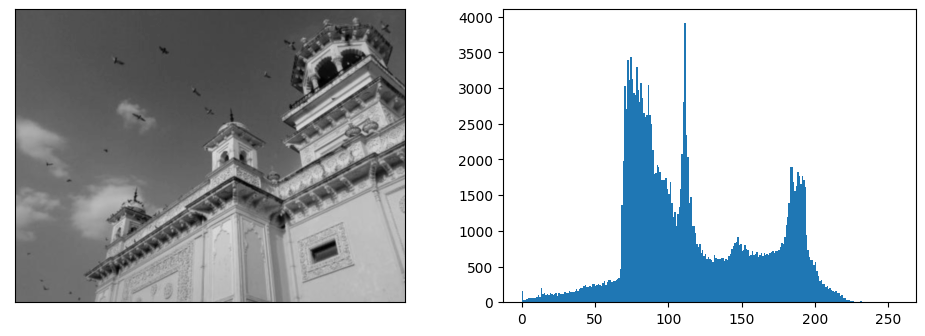

In [4]:
# Read image as grayscale
img_gray = cv.imread('../data/home.jpg', 0)

# Plot image
plt.figure(figsize=(10,4));
plt.subplot(1,2,1);
plt.imshow(img_gray, cmap="gray", interpolation="bicubic");
plt.xticks([]); plt.yticks([])

# Plot histogram
plt.subplot(1,2,2);
(hist, bins, _) = plt.hist(img_gray.ravel(), 256, [0,256]);

plt.tight_layout(pad=3.0)
plt.show()

You can also first calculate the histograms, and then use Matplotlibs normal `plt.plot()` function.

Let's calculate the histogram for each color channel in a color image using OpenCV's `cv.calcHist()` function, and plot them with Matplotlib's `plt.plot()` function. Notice the peak in the blue color channel around the value 170 which is due to the color of the "sky" in the image.

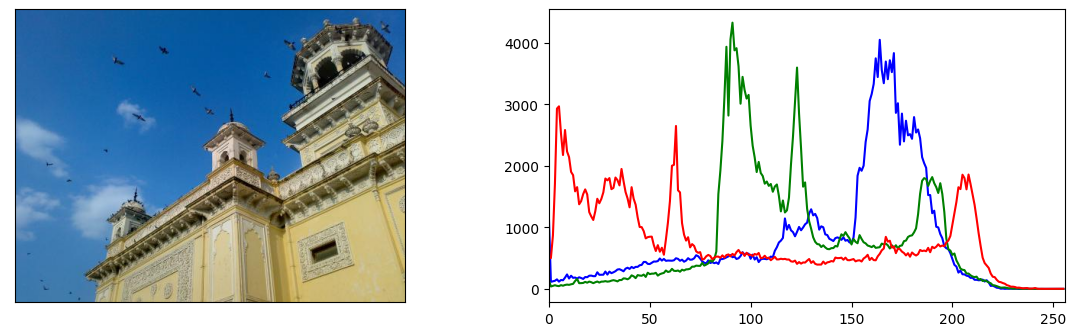

In [5]:
# Read image as (b,g,r) color
img_color = cv.imread('../data/home.jpg')

# Plot image
plt.figure(figsize=(12,4));
plt.subplot(1,2,1);
plt.imshow(img_color[:,:,::-1]);
plt.xticks([]); plt.yticks([])

# Calculate and plot histograms of each color channel (b,g,r)
color = ('b','g','r')
for i, col in enumerate(color):
    hist = cv.calcHist([img_color], [i], None, [256], [0,256])
    plt.subplot(1,2,2);
    plt.plot(hist, color = col)
    plt.xlim([0,256])

plt.tight_layout(pad=3.0)
plt.show()

## Using histogram masks with OpenCV

The third argument to `hist = cv.calcHist(images, channels, mask, histSize, ranges)` is a mask.

We have previously set this to `None` so that the histogram is calculated for the entire image. If we want to find a histogram of some Region Of Interest (ROI) in the image, we can create a *mask image* (same dimensions as the original image) with the color white (i.e. with all pixel values = 255 for each color channel) for the ROI, and the color black (i.e. with all pixel values = 0 for each color channel) otherwise. This is the mask we would supply as the third argument to the function above.

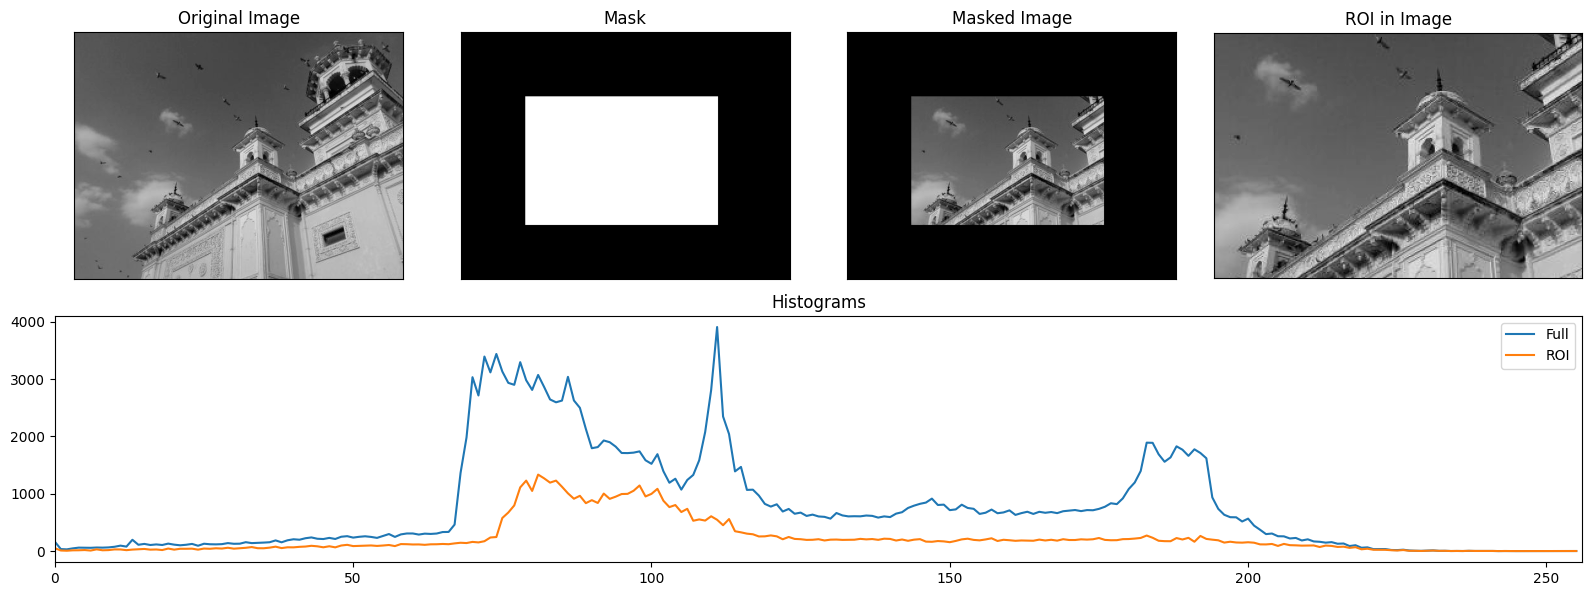

In [6]:
# Read in an image as grayscale
img = cv.imread('../data/home.jpg', 0)

# Create a mask with the same shape as the original image.
# Also set all elements in the mask to zero (black).
mask = np.zeros(img.shape[:2], np.uint8)

# Now select the Region Of Interest (ROI) in the mask
# by setting all elements in the ROI to 255 (white).
mask[100:300, 100:400] = 255

# 'AND' the image with itself using the mask (so we can plot this).
# This will "black-out" pixels outside of the ROI. 
masked_img = cv.bitwise_and(img, img, mask = mask)

# Let's select the ROI in the original image (so we can plot this).
roi_img = img[100:300, 100:400]

# Calculate the histogram for the whole image (no mask)
hist_full = cv.calcHist([img], [0], None, [256], [0,256])

# Calculate the histogram for the ROI in the image (with mask)
hist_mask = cv.calcHist([img], [0], mask, [256], [0,256])

# Plot the image, mask, masked image and the two histograms
plt.figure(figsize=(16,6))
plt.subplot(241), plt.imshow(img, 'gray'); plt.title('Original Image'); plt.xticks([]); plt.yticks([]);
plt.subplot(242), plt.imshow(mask,'gray'); plt.title('Mask'); plt.xticks([]); plt.yticks([]);
plt.subplot(243), plt.imshow(masked_img, 'gray'); plt.title('Masked Image'); plt.xticks([]); plt.yticks([]);
plt.subplot(244), plt.imshow(roi_img, 'gray'); plt.title('ROI in Image'); plt.xticks([]); plt.yticks([]);
plt.subplot(212), plt.plot(hist_full), plt.plot(hist_mask), plt.title('Histograms'); plt.legend({'Full','ROI'})
plt.xlim([0,256])

plt.tight_layout(pad=1.0)
plt.show()